<a href="https://colab.research.google.com/github/Kevinfhu/sistemas-de-informaci-n/blob/main/2_2_4_5_Lab_San_Francisco_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Título](Images/cisco.png)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Práctica de laboratorio: Delitos en San Francisco

### Objetivos

Demuestre sus conocimientos acerca del ciclo activo del análisis de datos mediante un conjunto de datos determinado, herramientas, Python y la libreta de anotaciones de Jupyter.

#### Parte 1: Importar los paquetes de Python
#### Parte 2: Cargar los datos
#### Parte 3: Preparar los datos
#### Parte 4: Analizar los datos
#### Parte 5: Visualizar los datos

### Segundo plano/situación

En esta práctica de laboratorio, importará algunos paquetes de Python que nos necesarios para analizar un conjunto de datos que contiene información sobre delitos en San Francisco. Luego utilizará Python y Jupyter Notebook para preparar estos datos para su análisis, analizarlos, graficarlos y comunicar sus conclusiones.

### Recursos necesarios

* 1 computadora con acceso a Internet
* Raspberry Pi versión 2 o superior
* Bibliotecas de Python: pandas, numpy, matplotlib, folium, datetime y csv
* Archivos de datos: Map-Crime_Incidents-Previous_Three_Months.csv

## Parte 1: Importar los paquetes de Python

En esta sección, importará los paquetes de Python que son necesarios para el resto de esta práctica de laboratorio.
#### numpy 
NumPy es el paquete fundamental para computación científica con Python. Contiene entre otras cosas: un potente objeto de matriz N dimensional y funciones sofisticadas (difusión).
#### pandas 
Pandas es un código abierto, una biblioteca con licencia BSD autorizada que proporciona un alto rendimiento, estructuras de datos fáciles de usar y herramientas de análisis de datos para el lenguaje de programación de Python.
#### matplotlib
Matplotlib es una biblioteca gráfica para el lenguaje de programación de Python y su extensión matemática numérica NumPy.
#### folium 
Folium es una biblioteca para crear mapas interactivos.

In [ ]:
# Code cell 1
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium 

## Parte 2: Cargar los datos

En esta sección, cargará el conjunto de datos de delitos en San Francisco y los paquetes de Python necesarios para analizarlo y visualizarlo.

#### Paso 1: Cargar los datos de delitos en San Francisco en un marco de datos.
En este paso, se importarán los datos de delitos en San Francisco de un archivo de valores separado por comas (csv) en una trama de datos.

In [ ]:
# code cell 2
# This should be a local path
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Ch2/Data/Map-Crime_Incidents-Previous_Three_Months.csv'

# read the original dataset (in comma separated values format) into a DataFrame
SF = pd.read_csv(dataset_path)

Para ver las primeras cinco líneas del archivo csv, se utilizará el comando 'head' de Linux.

In [ ]:
# code cell 3
!head -n 5 ./Data/Map-Crime_Incidents-Previous_Three_Months.csv

head: cannot open './Data/Map-Crime_Incidents-Previous_Three_Months.csv' for reading: No such file or directory


#### Paso 2: Ver los datos importados.

A) Al ingresar el nombre del marco de datos en una celda, puede visualizar las filas superior e inferior de manera estructurada.

In [ ]:
# Code cell 4
pd.set_option('display.max_rows', 10) #Visualize 10 rows 
SF

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)"
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)"
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)"
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)"
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)"
...,...,...,...,...,...,...,...,...,...,...,...,...
30755,NaN,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,06/01/2014 07:00:00 AM +0000,15:30,SOUTHERN,"ARREST, BOOKED",900.0 Block of MARKET ST,-122.408052,37.783957,"(37.7839574642528, -122.408051765969)"
30756,NaN,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,06/01/2014 07:00:00 AM +0000,16:00,NORTHERN,"ARREST, CITED",POLK ST / MCALLISTER ST,-122.418601,37.780261,"(37.7802607511488, -122.418600974625)"
30757,NaN,ASSAULT,BATTERY,Sunday,06/01/2014 07:00:00 AM +0000,15:00,TENDERLOIN,"ARREST, CITED",0.0 Block of JONES ST,-122.412122,37.781379,"(37.7813786419025, -122.412121608136)"
30758,NaN,ASSAULT,ASSAULT WITH CAUSTIC CHEMICALS,Sunday,06/01/2014 07:00:00 AM +0000,15:20,CENTRAL,NONE,200.0 Block of GEARY ST,-122.407434,37.787494,"(37.7874944447786, -122.407434204569)"


b) Utilice la función 'columns' para ver el nombre de las variables en el marco de datos.

In [ ]:
# Code cell 5
SF.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location'],
      dtype='object')

¿Cuántas variables se incluyen en el marco de datos de SF (ignore el índice)?

<font color= 'gray'>*Escriba su respuesta aquí*</font>

c) Utilice la función 'len' para determinar la cantidad de filas en el conjunto de datos.

In [ ]:
# Code cell 6
len(SF)

30760

## Parte 3: Preparar los datos

Ahora que cuenta con los datos cargados en el entorno de trabajo y determinó el análisis que desea realizar, es momento de preparar los datos para el análisis.


#### Paso 1: Extraer el mes y el día del campo de Date (Fecha).

'lambda' es una palabra clave de Python que define las reconocidas *funciones anónimas*. 'lambda' le permite especificar una función en una línea de código sin utilizar 'def' y sin definir un nombre específico para ella. La sintaxis para una expresión 'lambda' es:

'lambda' *parámetros*: *expresión*.

En este caso, la función 'lambda' se utiliza para crear una función en línea que seleccione solo los dígitos del mes de la variable Date (Fecha) e 'int' para convertir una representación de secuencia en un valor entero. Luego, la función *pandas* 'apply' se utiliza para aplicar esta función a una columna entera (en la práctica, 'apply' define implícitamente un bucle 'for' y pasa una por una las filas a la función 'lambda').  El mismo procedimiento se puede hacer para el día. 

In [ ]:
# Code cell 7
SF['Month'] = SF['Date'].apply(lambda row: int(row[0:2]))
SF['Day'] = SF['Date'].apply(lambda row: int(row[3:5]))

Para verificar que estas dos variables se agreguen al marco de datos de SF, use la función 'print' para imprimir algunos de los valores de estas columnas y 'type' para verificar que estas columnas nuevas contengan, de hecho, valores numéricos.

In [ ]:
# Code cell 8
print(SF['Month'][0:2])
print(SF['Day'][0:2])

0    8
1    8
Name: Month, dtype: int64
0    31
1    31
Name: Day, dtype: int64


In [ ]:
# Code cell 9
print(type(SF['Month'][0]))

<class 'numpy.int64'>


#### Paso 2: Eliminar las variables del marco de datos de SF.

a) La columna 'IncidntNum' contiene varias celdas con NaN. En este caso, faltan los datos. Además, 'IncidntNum' no proporciona ningún valor al análisis. La columna se puede descartar del marco de datos. Una manera de eliminar variables que no desea en un marco de datos es mediante la función 'del'.

In [ ]:
# Code cell 10
del SF['IncidntNum']

b) De manera similar, el atributo 'Location' no se incluirá en este análisis. Puede descartarse del marco de datos. 
<p>O bien, puede usar la función 'drop' en el marco de datos y especificar que el *eje* es el 1 (0 para las filas) y que el comando no requiere una asignación a otro valor para almacenar el resultado (*inplace = True*).

In [ ]:
# Code cell 11
SF.drop('Location', axis=1, inplace=True )

c) Verifique que se hayan eliminado las columnas.

In [ ]:
# Code cell 12
SF.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Month', 'Day'],
      dtype='object')

## Parte 4: Analizar los datos

Ahora que el marco de datos se ha elaborado con datos, es momento de analizar los datos. 

#### Paso 1: Resumir las variables para obtener información estadística.

a) Utilice la función 'value_counts' para resumir la cantidad de delitos cometidos por tipo; luego seleccione 'print' para visualizar los contenidos de la variable *CountCategory*.

In [ ]:
# Code cell 13
CountCategory = SF['Category'].value_counts()
print(CountCategory)

LARCENY/THEFT                 8205
OTHER OFFENSES                4004
NON-CRIMINAL                  3653
ASSAULT                       2518
VEHICLE THEFT                 1885
                              ... 
SEX OFFENSES, NON FORCIBLE       5
BAD CHECKS                       3
GAMBLING                         1
PORNOGRAPHY/OBSCENE MAT          1
BRIBERY                          1
Name: Category, Length: 36, dtype: int64


b) De manera predeterminada, los conteos se ordenan de forma descendente. El valor del parámetro opcional *ascendente* se puede configurar en *True* para invertir este comportamiento.

In [ ]:
# Code cell 14
SF['Category'].value_counts(ascending=True)

PORNOGRAPHY/OBSCENE MAT          1
GAMBLING                         1
BRIBERY                          1
BAD CHECKS                       3
SEX OFFENSES, NON FORCIBLE       5
                              ... 
VEHICLE THEFT                 1885
ASSAULT                       2518
NON-CRIMINAL                  3653
OTHER OFFENSES                4004
LARCENY/THEFT                 8205
Name: Category, Length: 36, dtype: int64

¿Qué tipo de delitos se cometió más?

*Escriba su respuesta aquí*

c) Al jerarquizar las dos funciones en un comando, puede lograr el mismo resultado con una línea de
código.

In [ ]:
# Code cell 15
print(SF['Category'].value_counts(ascending=True))

PORNOGRAPHY/OBSCENE MAT          1
GAMBLING                         1
BRIBERY                          1
BAD CHECKS                       3
SEX OFFENSES, NON FORCIBLE       5
                              ... 
VEHICLE THEFT                 1885
ASSAULT                       2518
NON-CRIMINAL                  3653
OTHER OFFENSES                4004
LARCENY/THEFT                 8205
Name: Category, Length: 36, dtype: int64


**Pregunta de desafío**: ¿Qué PdDistrict presentaba la mayoría de los incidentes de delitos informados? Proporcione los comandos de Python
utilizados para apoyar su respuesta.

<font color ='gray'>*Escriba su respuesta aquí*</font>

#### Paso 2: Crear subconjuntos de datos y organizarlos en marcos de datos más pequeños.

a) La indexación lógica se puede utilizar para seleccionar únicamente las filas en las cuales se cumple una condición específica. Por ejemplo, el código siguiente recupera sólo los delitos cometidos en agosto y guarda el resultado en un nuevo marco de datos.

In [ ]:
# Code cell 16
AugustCrimes = SF[SF['Month'] == 8]
AugustCrimes

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...
9715,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Friday,08/01/2014 07:00:00 AM +0000,19:55,MISSION,NONE,1100.0 Block of POTRERO AV,-122.406497,37.754279,8,1
9716,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Friday,08/01/2014 07:00:00 AM +0000,22:47,RICHMOND,NONE,1500.0 Block of BRODERICK ST,-122.441458,37.784427,8,1
9717,ASSAULT,THREATS AGAINST LIFE,Friday,08/01/2014 07:00:00 AM +0000,23:55,BAYVIEW,NONE,400.0 Block of TUNNEL AV,-122.401364,37.709748,8,1
9718,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Friday,08/01/2014 07:00:00 AM +0000,23:38,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,8,1


¿Cuántos incidentes de delitos hubo en agosto? 

<font color ='gray'>*9718*</font>

¿Cuántos robos se informaron en agosto?

<font color ='gray'>*1257*</font>

In [ ]:
# code cell 17
# Possible code for the question: How many burglaries were reported in the month of August?
AugustCrimes = SF[SF['Month'] == 8]
AugustCrimesB = SF[SF['Category'] == 'BURGLARY']
len(AugustCrimesB)

1257

b) Para crear un subconjunto del marco de datos de SF para un día específico, use la función 'query' para comparar el mes y el día al mismo tiempo.

In [ ]:
# Code cell 18
Crime0704 = SF.query('Month == 7 and Day == 4')
Crime0704

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
19087,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,22:30,SOUTHERN,NONE,8TH ST / MISSION ST,-122.413161,37.777457,7,4
19088,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,18:15,SOUTHERN,NONE,CLEMENTINA ST / 9TH ST,-122.412174,37.774201,7,4
19089,BURGLARY,"BURGLARY,RESIDENCE UNDER CONSTRT, FORCIBLE ENTRY",Friday,07/04/2014 07:00:00 AM +0000,00:50,TARAVAL,NONE,0.0 Block of MENDOSA AV,-122.466414,37.748011,7,4
19090,NON-CRIMINAL,LOST PROPERTY,Friday,07/04/2014 07:00:00 AM +0000,19:00,PARK,NONE,CASTRO ST / 16TH ST,-122.435318,37.764102,7,4
19091,ASSAULT,BATTERY,Friday,07/04/2014 07:00:00 AM +0000,21:00,NORTHERN,NONE,1000.0 Block of POLK ST,-122.419783,37.785894,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...
19423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,19:25,SOUTHERN,NONE,THE EMBARCADEROSOUTH ST / BRYANT ST,-122.388007,37.787103,7,4
19424,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Friday,07/04/2014 07:00:00 AM +0000,11:00,INGLESIDE,NONE,0.0 Block of FRATESSA CT,-122.399762,37.716129,7,4
19425,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,20:30,SOUTHERN,NONE,THE EMBARCADEROSOUTH ST / HARRISON ST,-122.388486,37.789573,7,4
19426,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,08:00,SOUTHERN,NONE,11TH ST / HARRISON ST,-122.412483,37.770631,7,4


In [ ]:
# Code cell 19
SF.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Month', 'Day'],
      dtype='object')

## Parte 5: Presentar los datos

La visualización y presentación de datos proporciona una descripción general inmediata que puede no ser evidente simplemente
observando los datos sin procesar. El marco de datos de SF contiene las coordenadas de longitud y latitud que se pueden utilizar para
graficar los datos.

#### Paso 1: Graficar el marco de datos de SF con las variables X e Y.

a) Utilice la función 'plot()' para graficar el marco de datos de SF. Utilice el parámetro opcional para crear el gráfico en rojo y configurar la forma del marcador en un círculo utilizando *ro*.

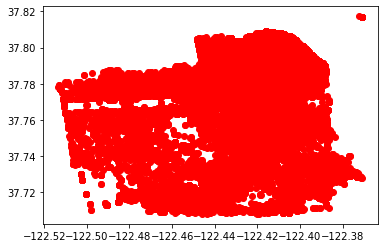

In [ ]:
# Code cell 20
plt.plot(SF['X'],SF['Y'], 'ro')
plt.show()

b) Identifique la cantidad de distritos de departamentos policiales y luego cree el diccionario *pd_districts* para asociar la secuencia a un valor entero.

In [ ]:
# Code cell 21
pd_districts = np.unique(SF['PdDistrict'])
pd_districts_levels = dict(zip(pd_districts, range(len(pd_districts))))
pd_districts_levels

{'BAYVIEW': 0,
 'CENTRAL': 1,
 'INGLESIDE': 2,
 'MISSION': 3,
 'NORTHERN': 4,
 'PARK': 5,
 'RICHMOND': 6,
 'SOUTHERN': 7,
 'TARAVAL': 8,
 'TENDERLOIN': 9}

c) Utilice 'apply' y 'lambda' para agregar la ID del valor entero del departamento policial a una nueva columna para el marco de datos. 

In [ ]:
# Code cell 22
SF['PdDistrictCode'] = SF['PdDistrict'].apply(lambda row: pd_districts_levels[row])

d) Utilice el *PdDistrictCode* creado recientemente para cambiar automáticamente el color.

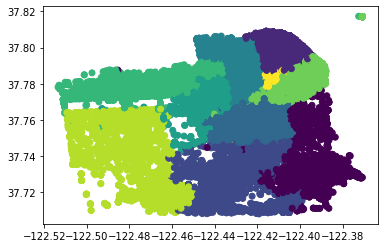

In [ ]:
# Code cell 23
plt.scatter(SF['X'], SF['Y'], c=SF['PdDistrictCode'])
plt.show()

#### Paso 2: Agregar los paquetes de mapas para mejorar el gráfico.

En el paso 1, creó un gráfico simple que muestra dónde ocurrieron los incidentes de delitos en el condado de SF. Este gráfico
es útil, pero 'folium' ofrece funciones adicionales que permiten superponer este gráfico en un mapa de OpenStreet. 

a) 'Folium' requiere que se especifique el color del marcador mediante un valor hexadecimal. Por este motivo, utilizamos el paquete *colores* y seleccionamos los colores necesarios.

In [ ]:
# Code cell 24
from matplotlib import colors
districts = np.unique(SF['PdDistrict'])
print(list(colors.cnames.values())[0:len(districts)])

['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF']


b) Cree un diccionario de colores para cada distrito del departamento policial.

In [ ]:
# Code cell 25
color_dict = dict(zip(districts, list(colors.cnames.values())[0:-1:len(districts)]))  
color_dict

{'BAYVIEW': '#F0F8FF',
 'CENTRAL': '#8A2BE2',
 'INGLESIDE': '#00FFFF',
 'MISSION': '#FF8C00',
 'NORTHERN': '#FF1493',
 'PARK': '#F8F8FF',
 'RICHMOND': '#4B0082',
 'SOUTHERN': '#FAFAD2',
 'TARAVAL': '#B0C4DE',
 'TENDERLOIN': '#9370DB'}

c) Cree el mapa con las coordenadas centrales de los datos de SF para centrar el mapa (utilice 'mean'). Para reducir el tiempo de cómputo, se utiliza *plotEvery* para limitar la cantidad de datos graficados. Establezca este valor a 1 para graficar todas las filas (puede llevar mucho tiempo visualizar el mapa).

In [ ]:
# Code cell 26
#Create map
map_osm = folium.Map(location=[SF['Y'].mean(), SF['X'].mean()], zoom_start = 12)
plotEvery = 50
obs = list(zip( SF['Y'], SF['X'], SF['PdDistrict']))

for el in obs[0:-1:plotEvery]:
    
    folium.CircleMarker(el[0:2], color=color_dict[el[2]], fill_color=el[2],radius=10).add_to(map_osm)
    

In [ ]:
# Code cell 27
map_osm

<font size='0.5'>&copy; 2017 Cisco y/o sus filiales. Todos los derechos reservados. Este documento es información pública de Cisco.<font>